In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_B(x):
    p1 = np.add(x, L) / np.sqrt(R**2 + np.square(np.add(x, L)))
    p2 = np.divide(x, np.sqrt(R**2 + np.square(x)))
    B_mT = np.multiply((Br/2), (p1 - p2))
    return B_mT * 1e-3

from scipy import optimize

def B_find_x(x, B0):
    return calculate_B(x) - B0

def calculate_displacement(Magnet):
    x_B = np.empty(len(Magnet))
    for i, field in enumerate(Magnet):
        x_B[i] = optimize.root(B_find_x, 40, args=field)['x']
    return x_B

def calculate_frequencies(v_centre, field):
    y = 28 #GHz/T
    return np.array(v_centre - (y * field), v_centre + (y * field))

# Better to save the m and c values which can then be used w/o using max motor range
# call this guy displacement_to_motor_calibration
# and a method that uses m and c displacement to motor coord
def displacement_to_motor_coord(M_lims, x):
    # M is motor positions, x corresponding magnet displacement
    m  = (M_lims[0] - M_lims[-1]) / (x[0] - x[-1]) # m = y1 - y0 / x1 - x0
    c = (M_lims[0] - np.multiply(m, x[0]))       # c  = y - mx
    y = np.multiply(m, x) + c
    return y

In [5]:
L = 0.5 * 25.4 # mm
R = 25.4 / 4 # mm
Br = 1000 ## mT given by material grade (N42)

x_max = 54 # mm    # estimated from line splittings
x_mid = 54-15
x_min = x_max-30 # mm

In [21]:
v = 2.87

# all units GHz and T
max_B = calculate_B(x_min)
mid_B = calculate_B(x_mid)
min_B = calculate_B(x_max)

min_v = calculate_frequencies(v, min_B)
mid_v = calculate_frequencies(v, mid_B)
max_v = calculate_frequencies(v, max_B)

print('min B: {minB:.5f} mid B: {midB:.5f} max B {maxB:.5f}'.format(minB=min_B, midB=mid_B, maxB=max_B))
print('min freq: {minv:.2f} mid freq: {midv:.2f} max freq {maxv:.2f} min'.format(minv=min_v, midv=mid_v, maxv=max_v))

min B: 0.00117 mid B: 0.00277 max B 0.00931
min freq: 2.84 mid freq: 2.79 max freq 2.61 min


In [22]:
x_lims = np.array([x_max, x_min])
M_lims = np.array([1000, 5000])

x = np.linspace(start=x_max, stop=x_min, num=20)

displacement_to_motor_coord(M_lims=M_lims, x=x)

array([1000.        , 1210.52631579, 1421.05263158, 1631.57894737,
       1842.10526316, 2052.63157895, 2263.15789474, 2473.68421053,
       2684.21052632, 2894.73684211, 3105.26315789, 3315.78947368,
       3526.31578947, 3736.84210526, 3947.36842105, 4157.89473684,
       4368.42105263, 4578.94736842, 4789.47368421, 5000.        ])

Text(0.5,0,'Distance to sample')

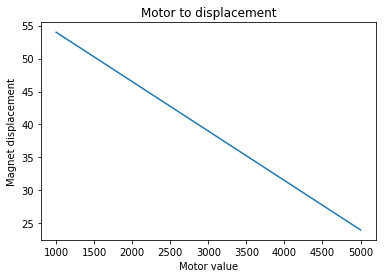

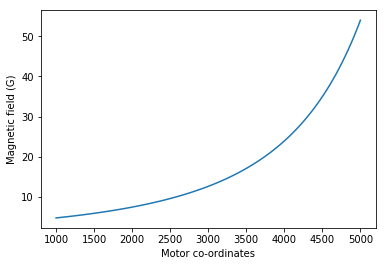

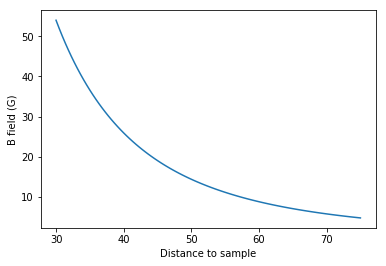

In [23]:
M = displacement_to_motor_coord(M_lims=M_lims, x=x_lims)
x = np.linspace(start=x_max, stop=x_min, num=20)

x = np.linspace(start=75, stop=30, num=100)


plt.figure()
plt.plot(M, x_lims); plt.title('Motor to displacement')
plt.xlabel('Motor value'); plt.ylabel('Magnet displacement')

plt.figure()
plt.plot(displacement_to_motor_coord(M_lims=M_lims, x=x), calculate_B(x)*1e4)
plt.ylabel('Magnetic field (G)'); plt.xlabel('Motor co-ordinates')

plt.figure()
plt.plot(x, calculate_B(x)*1e4)
plt.ylabel('B field (G)'); plt.xlabel('Distance to sample')